# [Fourier](https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm)
Fourier Transforms are used in image processing and analysis for a variety of purposes:

1. Image Filtering: Fourier Transforms are used to analyze the frequency components of an image. This can be used to apply a filter in the frequency domain, which can be useful for removing noise or other unwanted frequency components.

2. Image Compression: Fourier Transforms can be used to convert an image into its frequency components. This can be used to compress the image by only storing the most significant frequencies.

3. Pattern Recognition: Fourier Transforms can be used to identify patterns in an image. This can be useful for tasks such as face recognition or object detection.

4. Image Enhancement: Fourier Transforms can be used to enhance certain features of an image. For example, it can be used to increase the contrast of an image.

5. Edge Detection: Fourier Transforms can be used to detect edges in an image. This can be useful for tasks such as segmentation or feature extraction.

6. Image Reconstruction: In medical imaging, Fourier Transforms are used to reconstruct images from raw data obtained from devices like CT scanners or MRI machines.

7. Image Registration: Fourier Transforms can be used to align images, which is particularly useful in medical imaging where multiple images from different modalities need to be aligned for comparison or analysis.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

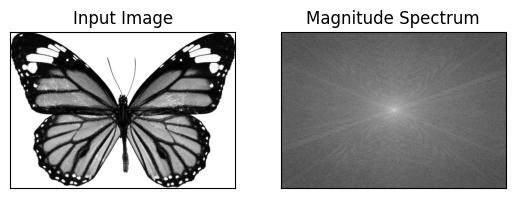

In [2]:
image = cv2.imread('./resources/Butterfly.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the 2-dimensional discrete Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Compute the magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


# Log Transform
[Link](https://www.geeksforgeeks.org/log-transformation-of-an-image-using-python-and-opencv/)

/var/folders/v4/_9qm3gjj3g56v_smz1lgkf500000gn/T/ipykernel_59798/292181846.py:4: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
/var/folders/v4/_9qm3gjj3g56v_smz1lgkf500000gn/T/ipykernel_59798/292181846.py:6: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


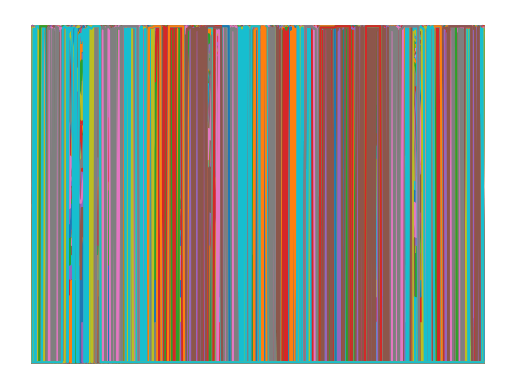

In [7]:
image = cv2.imread('./resources/Butterfly.jpg', cv2.IMREAD_GRAYSCALE)

c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1))

log_image = np.array(log_image, dtype = np.uint8)

# image_log = cv2.normalize(image_log, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.plot(log_image)
plt.axis('off')
plt.show()


# Wavelet Transforms

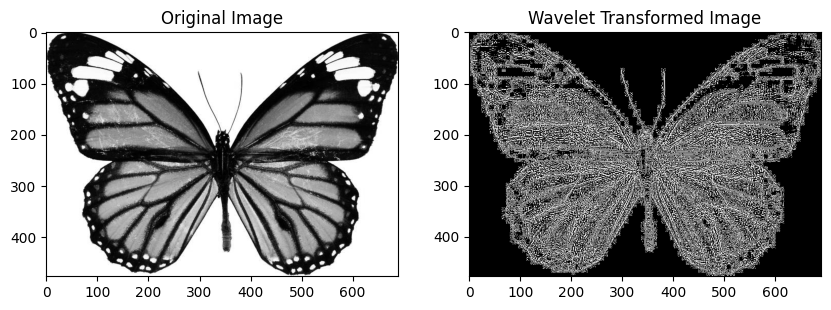

In [12]:
image = cv2.imread('./resources/Butterfly.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = np.float32(image)
image /= 255.0

# Apply wavelet transform
coeffs = pywt.wavedec2(image, 'haar', level = 1)

# Extract approximation and detail coefficients
# cA, (cH, cV, cD) = coeffs

coeffs_H=list(coeffs)  
coeffs_H[0] *= 0

# Reconstruct the image
cA = pywt.waverec2(coeffs_H, 'haar')
cA *= 255.0
cA = np.uint8(cA)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

# Transformed image
axs[1].imshow(cA, cmap='gray')
axs[1].set_title('Wavelet Transformed Image')

plt.show()
